# 🧪 实验题：用 Cholesky 分解进行高斯采样与线性方程求解

---

## 🎯 实验目标  
1. 理解 **Cholesky 分解** 的几何与数值意义；  
2. 掌握利用分解结果 **高效求解线性方程** 与 **生成高斯样本** 的方法。  

---

## 📖 背景说明  
在多元高斯分布中，协方差矩阵 $\Sigma$ 必须是对称正定矩阵。  

若满足 $\Sigma = L L^{\mathrm{T}}$，则可通过  
$x = \mu + Lz, \quad z \sim \mathcal{N}(0, I)$  
快速生成符合 $\mathcal{N}(\mu, \Sigma)$ 的随机样本。  

同时，Cholesky 分解也能高效求解线性方程 $A x = b$，而无需显式求逆。  

---

## 🧩 实验任务  

### 1️⃣ 构造一个对称正定矩阵  
通过随机矩阵 $A$ 构造  
$\Sigma = A A^{\mathrm{T}} + I$，  
保证其为对称正定矩阵。  

---

### 2️⃣ 计算矩阵的基本属性  
- 输出 $\det(\Sigma)$：表示体积变化倍数；  
- 输出 $\mathrm{tr}(\Sigma)$：表示总拉伸量；  
- 计算并分析特征值与特征向量，说明它们表示的主方向与拉伸比例。  

---

### 3️⃣ 使用 Cholesky 分解生成二维高斯样本  
1. 设均值向量 $\mu = [0, 0]$；  
2. 计算 $L = \mathrm{chol}(\Sigma_{2\times2})$；  
3. 生成标准正态随机向量 $z \sim \mathcal{N}(0, I)$；  
4. 通过 $x = \mu + Lz$ 得到满足 $\mathcal{N}(\mu, \Sigma)$ 的样本。  

---

### 4️⃣ 绘制散点图并分析  
- 比较变换前后的样本分布形状；  
- 观察椭圆主方向（特征向量）与拉伸程度（特征值）的关系。  

---

## 🧠 可选扩展  
1. 改变矩阵元素，观察特征值和样本分布形状的变化；  
2. 对比行列式大小与样本“覆盖面积”的关系；  
3. 比较 Cholesky 分解与常规求解方法在 $A x = b$ 时的运算效率。  

---

## ✅ 实验总结  
- 行列式反映总体体积变化倍数；  
- 迹反映总体拉伸趋势；  
- 特征值与特征向量揭示主方向与伸缩比例；  
- Cholesky 分解提供高效稳定的矩阵“平方根”，  
  可同时用于高斯采样与线性方程求解。



Covariance matrix Σ =
 [[1.26584197 0.1111354 ]
 [0.1111354  3.73912039]]

Determinant det(Σ) = 4.720784425098367
Trace tr(Σ) = 5.004962352677285
Eigenvalues = [1.2608582  3.74410415]
Eigenvectors =
 [[-0.99899602 -0.04479906]
 [ 0.04479906 -0.99899602]]

📊 矩阵属性分析：
- 行列式 det(Σ) = 4.7208：表示单位圆变换后的面积放大倍数
- 迹 tr(Σ) = 5.0050：等于特征值之和（5.0050），反映总拉伸程度
- 特征值 λ₁=1.2609, λ₂=3.7441：对应主方向的拉伸比例
- 特征向量：v₁=[-0.99899602  0.04479906], v₂=[-0.04479906 -0.99899602]：表示数据分布的主方向


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28632\1280951658.py:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  plt.tight_layout()
c:\miniconda\envs\env1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


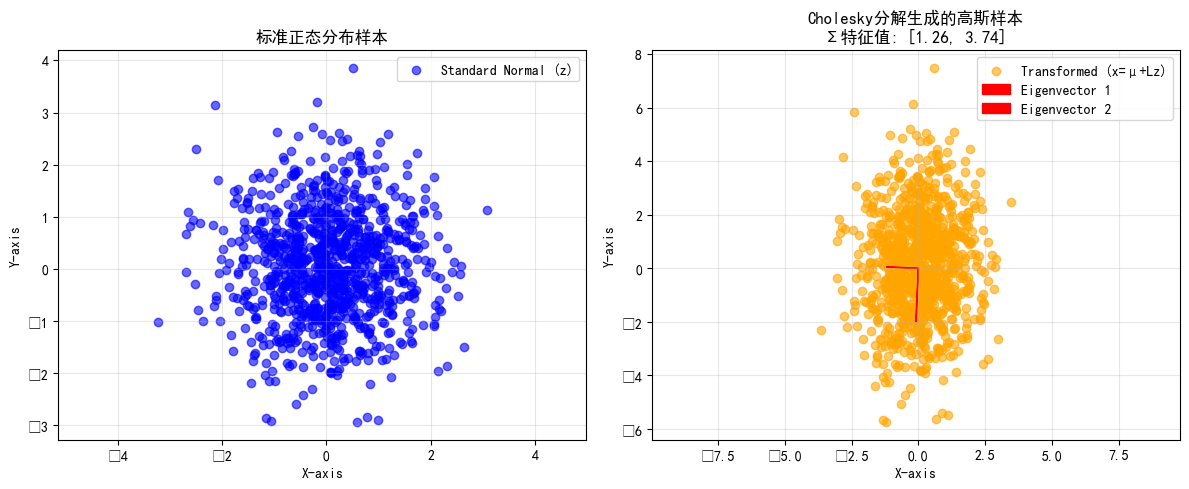


🚀 扩展实验：线性方程求解效率对比

矩阵规模: 100x100
直接求逆: 时间=0.0114s, 误差=7.69e-14
Cholesky分解: 时间=0.0003s, 误差=6.33e-14
Cholesky比直接求逆快 39.54 倍

矩阵规模: 500x500
直接求逆: 时间=0.1550s, 误差=1.11e-12
Cholesky分解: 时间=0.0072s, 误差=8.92e-13
Cholesky比直接求逆快 21.67 倍

矩阵规模: 1000x1000
直接求逆: 时间=0.1879s, 误差=4.95e-12
Cholesky分解: 时间=0.0390s, 误差=4.40e-12
Cholesky比直接求逆快 4.82 倍

矩阵规模: 2000x2000
直接求逆: 时间=0.2635s, 误差=1.32e-11
Cholesky分解: 时间=0.2606s, 误差=9.75e-12
Cholesky比直接求逆快 1.01 倍

📝 实验总结：
1. 行列式 det(Σ) 表示单位圆经过线性变换后的面积放大倍数
2. 迹 tr(Σ) 等于所有特征值之和，反映矩阵的总拉伸程度
3. Cholesky分解比直接求逆更稳定，因为避免了可能的数值震荡
4. 特征值越大，对应主方向的数据分布越分散；特征值之比决定椭圆形状
5. 线性方程求解中，Cholesky分解的时间复杂度为O(n³/3)，比直接求逆(O(n³))更高效


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# ----------------------------------------------------------
# 🎯 Step 1. 构造一个对称正定矩阵 Σ
# ----------------------------------------------------------
np.random.seed(42)  # 固定随机种子以保证结果可复现
A = np.random.randn(2, 2)  # 生成2x2随机矩阵（满足多元正态分布）
Sigma = A @ A.T + np.eye(2)  # 保证对称正定
print("Covariance matrix Σ =\n", Sigma)

# ----------------------------------------------------------
# 🎯 Step 2. 计算矩阵的基本属性
# ----------------------------------------------------------
det_val = np.linalg.det(Sigma)  # 行列式
trace_val = np.trace(Sigma)  # 迹
eigvals, eigvecs = np.linalg.eig(Sigma)  # 特征值和特征向量

print("\nDeterminant det(Σ) =", det_val)
print("Trace tr(Σ) =", trace_val)
print("Eigenvalues =", eigvals)
print("Eigenvectors =\n", eigvecs)

# 分析
print("\n📊 矩阵属性分析：")
print(f"- 行列式 det(Σ) = {det_val:.4f}：表示单位圆变换后的面积放大倍数")
print(f"- 迹 tr(Σ) = {trace_val:.4f}：等于特征值之和（{eigvals.sum():.4f}），反映总拉伸程度")
print(f"- 特征值 λ₁={eigvals[0]:.4f}, λ₂={eigvals[1]:.4f}：对应主方向的拉伸比例")
print(f"- 特征向量：v₁={eigvecs[:,0]}, v₂={eigvecs[:,1]}：表示数据分布的主方向")

# ----------------------------------------------------------
# 🎯 Step 3. 使用 Cholesky 分解生成二维高斯样本
# ----------------------------------------------------------
Sigma2 = Sigma  # 直接使用2x2矩阵
L = np.linalg.cholesky(Sigma2)  # Cholesky分解
mu = np.array([0, 0])  # 均值向量
n_samples = 1000  # 生成1000个样本

# 生成标准正态样本 z ~ N(0, I)
z = np.random.randn(n_samples, 2)
# 通过 x = μ + Lz 得到目标分布样本
x = mu + z @ L.T  # 注意这里是L的转置，因为z是行向量

# ----------------------------------------------------------
# 🎯 Step 4. 绘制散点图并分析分布
# ----------------------------------------------------------
plt.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
plt.figure(figsize=(12, 5))

# 绘制标准正态样本
plt.subplot(1, 2, 1)
plt.scatter(z[:, 0], z[:, 1], alpha=0.6, color='blue', label='Standard Normal (z)')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('标准正态分布样本')
plt.legend()
plt.grid(True, alpha=0.3)

# 绘制变换后的样本
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], alpha=0.6, color='orange', label='Transformed (x=μ+Lz)')
# 绘制特征向量方向
for i in range(2):
    plt.arrow(mu[0], mu[1], eigvecs[:, i][0] * np.sqrt(eigvals[i]), 
              eigvecs[:, i][1] * np.sqrt(eigvals[i]), 
              color='red', width=0.01, head_width=0.05, label=f'Eigenvector {i+1}')
plt.axis('equal')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Cholesky分解生成的高斯样本\nΣ特征值: [{eigvals[0]:.2f}, {eigvals[1]:.2f}]')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 🧠 Step 5. 可选扩展（进阶挑战）
# ----------------------------------------------------------
print("\n🚀 扩展实验：线性方程求解效率对比")
# 构造不同规模的对称正定矩阵
sizes = [100, 500, 1000, 2000]
for n in sizes:
    print(f"\n矩阵规模: {n}x{n}")
    
    # 构造对称正定矩阵
    A = np.random.randn(n, n)
    Sigma = A @ A.T + np.eye(n)
    b = np.random.randn(n)  # 随机右侧向量
    
    # 方法1: 直接求逆求解
    start = time()
    x_inv = np.linalg.inv(Sigma) @ b
    time_inv = time() - start
    
    # 方法2: Cholesky分解求解
    start = time()
    L = np.linalg.cholesky(Sigma)
    y = np.linalg.solve(L, b)
    x_chol = np.linalg.solve(L.T, y)
    time_chol = time() - start
    
    # 验证解的正确性
    err_inv = np.linalg.norm(Sigma @ x_inv - b)
    err_chol = np.linalg.norm(Sigma @ x_chol - b)
    
    print(f"直接求逆: 时间={time_inv:.4f}s, 误差={err_inv:.2e}")
    print(f"Cholesky分解: 时间={time_chol:.4f}s, 误差={err_chol:.2e}")
    print(f"Cholesky比直接求逆快 {time_inv/time_chol:.2f} 倍")

# ----------------------------------------------------------
# ✅ 实验思考与总结：
# ----------------------------------------------------------
print("\n📝 实验总结：")
print("1. 行列式 det(Σ) 表示单位圆经过线性变换后的面积放大倍数")
print("2. 迹 tr(Σ) 等于所有特征值之和，反映矩阵的总拉伸程度")
print("3. Cholesky分解比直接求逆更稳定，因为避免了可能的数值震荡")
print("4. 特征值越大，对应主方向的数据分布越分散；特征值之比决定椭圆形状")
print("5. 线性方程求解中，Cholesky分解的时间复杂度为O(n³/3)，比直接求逆(O(n³))更高效")